In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [2]:
df = pd.read_csv("./eda-proj-fc-purchase.csv")
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


In [3]:
df['환불금액'] = pd.to_numeric(df['환불금액'], errors='coerce').fillna(0).astype(int)
df['환불금액']

0              0
1              0
2              0
3              0
4              0
           ...  
159323         0
159324         0
159325         0
159326         0
159327   -345240
Name: 환불금액, Length: 159328, dtype: int64

In [4]:
df['판매가격'] = pd.to_numeric(df['판매가격'], errors='coerce').fillna(0).astype(int)
df['판매가격']

0         189000
1         501000
2         549000
3         165000
4         239000
           ...  
159323    217000
159324    385000
159325    166000
159326    289000
159327    370000
Name: 판매가격, Length: 159328, dtype: int64

In [5]:
df['거래금액'] = pd.to_numeric(df['거래금액'], errors='coerce').fillna(0).astype(int)
df['거래금액']

0         159000
1         501000
2         549000
3         135000
4         239000
           ...  
159323    207000
159324    385000
159325    136000
159326    289000
159327         0
Name: 거래금액, Length: 159328, dtype: int64

In [6]:
df['쿠폰할인액'] = pd.to_numeric(df['쿠폰할인액'], errors='coerce').fillna(0).astype(int)
df['쿠폰할인액']

0             0
1             0
2             0
3         30000
4             0
          ...  
159323    10000
159324        0
159325    30000
159326        0
159327        0
Name: 쿠폰할인액, Length: 159328, dtype: int64

In [7]:
df['매출'] = df['실거래금액'] - df['환불금액']

In [8]:

df['거래일자'] = pd.to_datetime(df['거래일자'].str.replace("오후", "PM").str.replace("오전", "AM"), format="%Y. %m. %d. %p %I:%M:%S")

# 연, 월, 일, 시 추출 및 새로운 열에 저장
df['연'] = df['거래일자'].dt.year
df['월'] = df['거래일자'].dt.month
df['일'] = df['거래일자'].dt.day
df['시'] = df['거래일자'].dt.hour


In [9]:
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액', '매출', '연',
       '월', '일', '시'],
      dtype='object')

In [10]:
df2 = df ## 열 이름 영어로 변경

In [11]:
df2.columns = ['trans_id', 'type', 'custom_id', 'course_id', 'site', 'format', 'category', 'course_name', 'trans_date', 'coupon_name',
               'sales_price', 'pay_method', 'actual_amount', 'coupon_dc', 'trans_amount', 'refund_amount', 'revenue',
               'year', 'month', 'day', 'hour']

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   trans_id       159328 non-null  int64         
 1   type           159328 non-null  object        
 2   custom_id      159328 non-null  int64         
 3   course_id      159328 non-null  int64         
 4   site           159328 non-null  object        
 5   format         159328 non-null  object        
 6   category       159328 non-null  object        
 7   course_name    159328 non-null  object        
 8   trans_date     159328 non-null  datetime64[ns]
 9   coupon_name    159328 non-null  object        
 10  sales_price    159328 non-null  int64         
 11  pay_method     159328 non-null  object        
 12  actual_amount  159328 non-null  int64         
 13  coupon_dc      159328 non-null  int64         
 14  trans_amount   159328 non-null  int64         
 15  

In [13]:
sorted_m = df2.groupby(by='month')['revenue'].sum().reset_index()
sorted_h = df2.groupby(by='hour')['revenue'].sum().reset_index()
sorted_h
sorted_m

,month,revenue
0,1,2672531725
1,2,2080834210
2,3,1816813140
3,4,1621887410
4,5,1435449750
5,6,2014805020
6,7,2198912103
7,8,2311152054
8,9,2237183668
9,10,2000741128


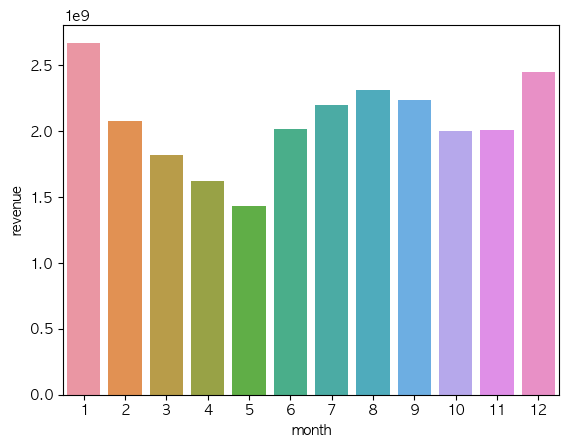

In [14]:
sns.barplot(data=sorted_m, x='month', y='revenue')
plt.show()

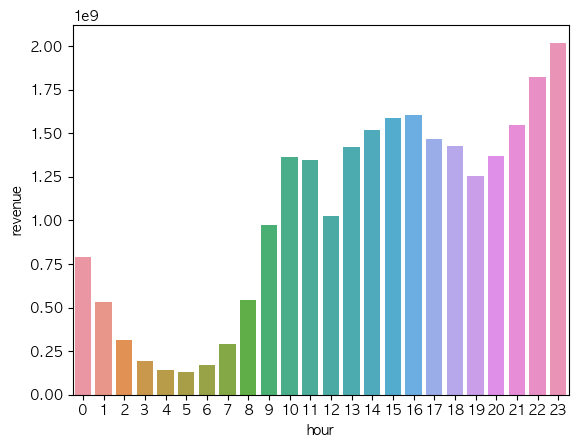

In [15]:
sns.barplot(data=sorted_h, x='hour', y='revenue')
plt.show()

In [16]:
category_list = df2.category.unique()
category_list

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

In [17]:
df_sorted_date = df2.groupby(by=['month', 'day'])['revenue'].sum().reset_index()


In [18]:
df_sorted_date['new_date'] = df_sorted_date['month'].astype(str) + "." + df_sorted_date['day'].astype(str)
df_sorted_date['new_date'] = df_sorted_date['new_date'].astype(float)

In [19]:
df_sorted_date['income'] = df_sorted_date['revenue'] / 1000000
df_sorted_date['income'] = df_sorted_date['income'].astype(int)
df_sorted_date

,month,day,revenue,new_date,income
0,1,1,35128750,1.10,35
1,1,2,42187200,1.20,42
2,1,3,128340250,1.30,128
3,1,4,110246900,1.40,110
4,1,5,176517630,1.50,176
...,...,...,...,...,...
360,12,27,71881250,12.27,71
361,12,28,70037640,12.28,70
362,12,29,135766960,12.29,135
363,12,30,90839660,12.30,90


In [20]:
df_sk = df_sorted_date[['new_date', 'income']]
df_sk

,new_date,income
0,1.10,35
1,1.20,42
2,1.30,128
3,1.40,110
4,1.50,176
...,...,...
360,12.27,71
361,12.28,70
362,12.29,135
363,12.30,90


In [21]:
df_sk_train = df_sk.iloc[0:300]       # 0~299행 (총 300행)
df_sk_val = df_sk.iloc[300:330]       # 300~329행 (총 30행)
df_sk_test = df_sk.iloc[330:365]      # 330~364행 (총 35행)

In [22]:
print(len(df_sk_train))
print(len(df_sk_val))
print(len(df_sk_test))

300
30
35


In [23]:
df_sk_train

,new_date,income
0,1.10,35
1,1.20,42
2,1.30,128
3,1.40,110
4,1.50,176
...,...,...
295,10.23,117
296,10.24,65
297,10.25,69
298,10.26,59


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train = df_sk_train['new_date'].values.reshape(-1, 1)
y_train = df_sk_train['income']

x_val = df_sk_val['new_date'].values.reshape(-1, 1)
y_val = df_sk_val['income']

x_test = df_sk_test['new_date'].values.reshape(-1, 1)
y_test = df_sk_test['income']

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(x_val)
y_pred
# # 정확도 계산
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


/opt/homebrew/Caskroom/miniconda/base/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


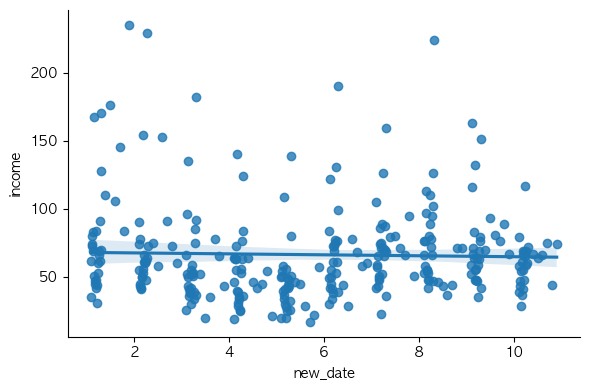

In [25]:
sns.lmplot(data=df_sk_train, x='new_date', y='income', height=4, aspect=1.5)
plt.show()

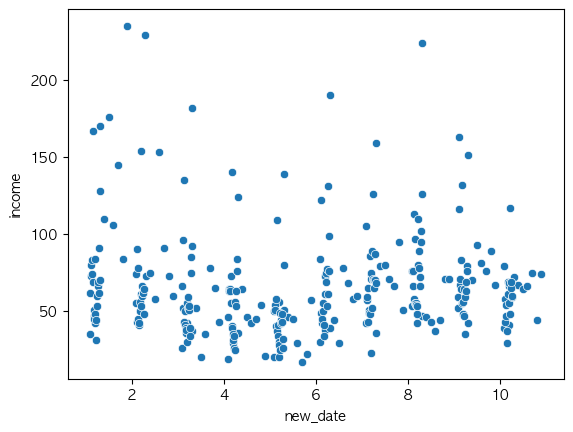

In [26]:
sns.scatterplot(data=df_sk_train, x='new_date', y='income')
plt.show()

In [27]:
### category no 딕셔너리 만들기
df_cate = df2.category
df_cate = df_cate.drop_duplicates() # 중복 삭제
df_cate = df_cate.reset_index(drop=True) # 인덱스 재설정
df_cate = df_cate.reset_index() # 데이터프레임 형태로 만들기
df_cate.columns = ['category_no', 'category']
df_cate

,category_no,category
0,0,업무 생산성
1,1,부동산/금융
2,2,영상/3D
3,3,프로그래밍
4,4,마케팅
5,5,일러스트
6,6,디자인
7,7,데이터 사이언스
8,8,부업/창업
9,9,투자/재테크


In [28]:
### payment no 딕셔너리 만들기
df_pay = df2.pay_method
df_pay

df_pay = df_pay.drop_duplicates() # 중복 삭제
df_pay = df_pay.reset_index(drop=True) # 인덱스 재설정
df_pay = df_pay.reset_index() # 데이터프레임 형태로 만들기
df_pay.columns = ['pay_no', 'pay_method']
df_pay

,pay_no,pay_method
0,0,TRANSFER
1,1,CARD
2,2,POINT
3,3,PROMOTION
4,4,TRANS
5,5,VBANK


In [29]:
df3 = pd.merge(df2, df_cate) # 카테고리 번호 열 추가
df4 = pd.merge(df3, df_pay) # 페이먼트 번호 열 추가
df4.head()

,trans_id,type,custom_id,course_id,site,format,category,course_name,trans_date,coupon_name,...,coupon_dc,trans_amount,refund_amount,revenue,year,month,day,hour,category_no,pay_no
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,...,0,159000,0,159000,2022,12,31,22,0,0
1,2394723,PAYMENT,85573,210569,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 문서의 신이 알려주는 보고서의 법칙 : 비즈니스 글쓰기의 모든 것,2022-12-27 16:12:42,-,...,0,166000,0,166000,2022,12,27,16,0,0
2,2390021,PAYMENT,57865,203498,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 한 번에 끝내는 엑셀 실무,2022-12-26 13:12:09,-,...,0,150000,0,150000,2022,12,26,13,0,0
3,2390020,PAYMENT,73080,203498,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 한 번에 끝내는 엑셀 실무,2022-12-26 13:12:09,-,...,0,150000,0,150000,2022,12,26,13,0,0
4,2390013,PAYMENT,86385,203535,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,2022-12-26 13:12:09,-,...,0,157000,0,157000,2022,12,26,13,0,0


In [30]:
df4.pay_no.value_counts()
df.pay_method.value_counts()

pay_method
CARD         108204
POINT         22778
PROMOTION     15203
TRANS          6282
VBANK          4824
TRANSFER       2037
Name: count, dtype: int64

[]

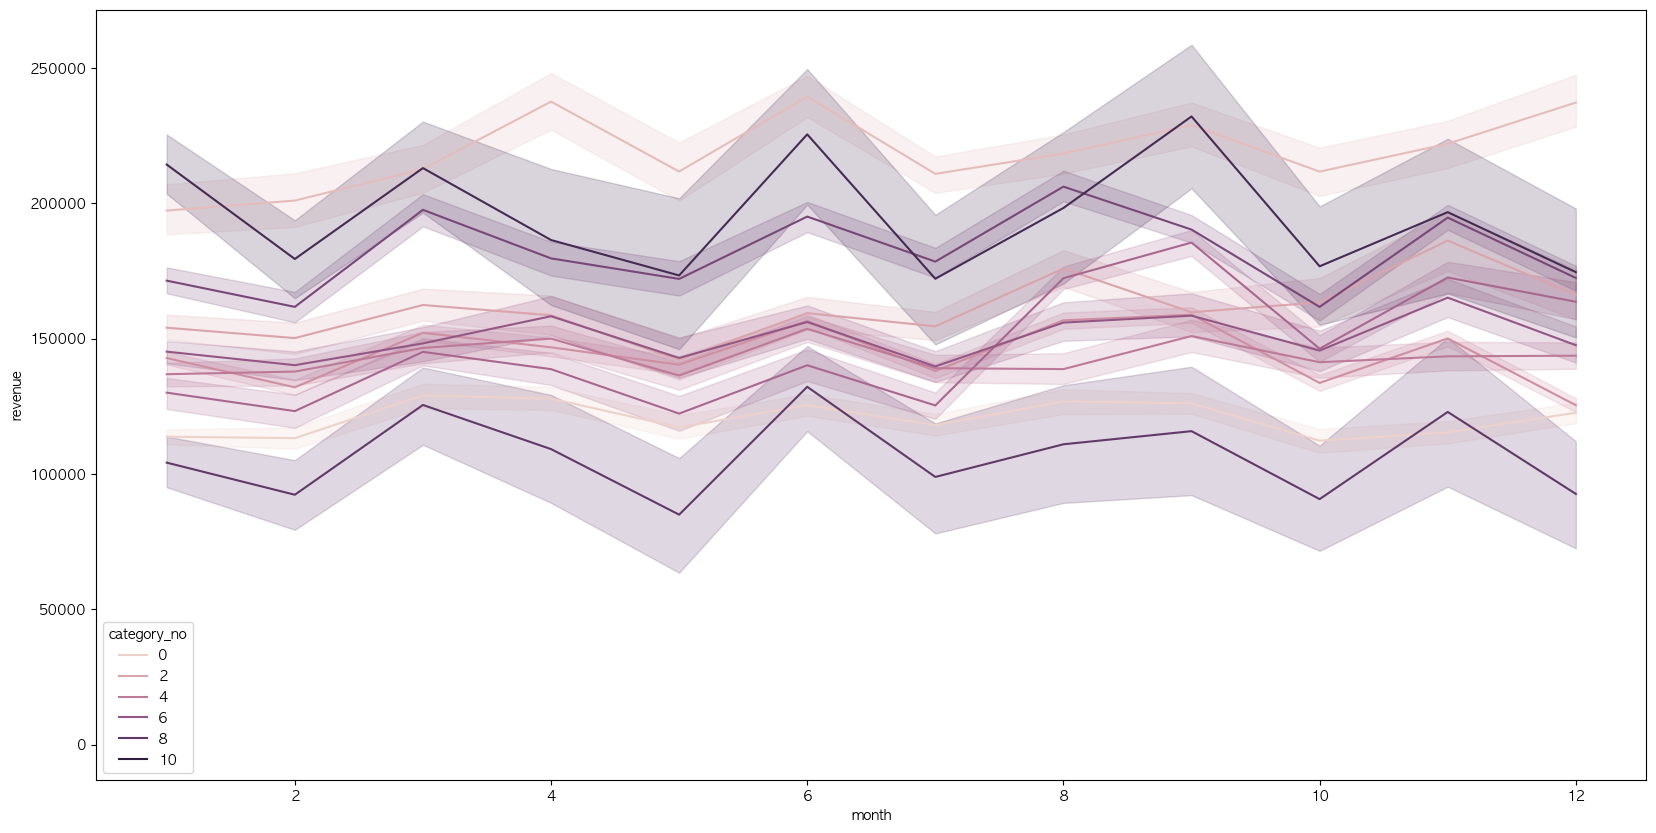

In [31]:
# sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="month", y="revenue", hue="category_no", data=df4, ax=ax)
plt.plot()

In [32]:
df_corr = df4
df_corr
df_corr = df_corr.drop(['year', 'type', 'site', 'format', 'course_name', 'trans_date', 'coupon_name', 'category', 'pay_method'], axis=1)
df_corr.head(30)

,trans_id,custom_id,course_id,sales_price,actual_amount,coupon_dc,trans_amount,refund_amount,revenue,month,day,hour,category_no,pay_no
0,2417084,20053,209016,189000,159000,0,159000,0,159000,12,31,22,0,0
1,2394723,85573,210569,166000,166000,0,166000,0,166000,12,27,16,0,0
2,2390021,57865,203498,150000,150000,0,150000,0,150000,12,26,13,0,0
3,2390020,73080,203498,150000,150000,0,150000,0,150000,12,26,13,0,0
4,2390013,86385,203535,157000,157000,0,157000,0,157000,12,26,13,0,0
5,2390012,80381,203535,157000,157000,0,157000,0,157000,12,26,13,0,0
6,2390011,26811,203173,173000,173000,0,173000,0,173000,12,26,13,0,0
7,2390010,38634,204373,167000,167000,0,167000,0,167000,12,26,13,0,0
8,2390006,28127,205640,187000,187000,0,187000,0,187000,12,26,13,0,0
9,2390005,4272,205640,187000,187000,0,187000,0,187000,12,26,13,0,0


In [33]:
df_corr.info()
# df_corr = df_corr.corr().round(2)
# df_corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   trans_id       159328 non-null  int64
 1   custom_id      159328 non-null  int64
 2   course_id      159328 non-null  int64
 3   sales_price    159328 non-null  int64
 4   actual_amount  159328 non-null  int64
 5   coupon_dc      159328 non-null  int64
 6   trans_amount   159328 non-null  int64
 7   refund_amount  159328 non-null  int64
 8   revenue        159328 non-null  int64
 9   month          159328 non-null  int32
 10  day            159328 non-null  int32
 11  hour           159328 non-null  int32
 12  category_no    159328 non-null  int64
 13  pay_no         159328 non-null  int64
dtypes: int32(3), int64(11)
memory usage: 15.2 MB


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.show()


KeyboardInterrupt: 